## Avaliação em holdouts - Movielens

In [1]:
import os
import sys
sys.path.append(os.path.abspath('') + '/..')

In [2]:
from data import ImplicitData
import pandas as pd 
import numpy as np 
from plot_utils import lineplot_recallxholdout, recall_heatmap
from recommenders_implicit import ISGD  # ISGD framework, BISGD,
from eval_implicit import EvaluateAndStore # EvaluateAndStore para guardar estados do modelo e holdouts, a avaliação prequencial de ratings implicitos é opcional, , EvalHoldout

In [3]:
# importa dataset 'movielensm1'
data = pd.read_csv("../datasets/ml1m_gte5.csv","\t")

In [4]:
# Sample ...
# data = data.iloc[:int( data.shape[0]/7 )]

In [5]:
num_factors = 160
num_iter = 8
learn_rate = 0.1
regularization = 0.4
num_nodes = 8

___
## ISGD

In [6]:
# transforma interações em objeto que contem mappings usuário-itens e item-usuários, contém também métodos de suporte.
# recebe listas
# stream = ImplicitData(data['UserID'].to_list(), data['ItemID'].to_list())
stream = ImplicitData(data['UserID'], data['ItemID'])

empty_stream = ImplicitData([], [])

In [7]:
# O modelo não pode conter o stream, deve ser iniciado com uma lista vazia
# Se o stream for passado, ao excluir itens conhecidos o recall é sempre 0. Ao permitir a recomendação de itens já vistos, o recall não é 0.
model = ISGD(empty_stream, num_factors, num_iter, learn_rate = learn_rate, u_regularization = regularization, i_regularization = regularization, random_seed = 10)

In [8]:
# criamos instancia de EvaluateAndStore para criar holdouts com o método EvaluateAndStore
eval = EvaluateAndStore(model=model, data=stream, n_holdouts=20, metrics=["Recall@N"], N_recommendations=20, seed=42)

In [9]:
# interações de 0 a 100 são usadas para pre treino. 
# count define numero de interações a serem usadas.
# holdouts e checkpoints são 
# store_only - somente guarda holdouts, não faz avaliação prequencial.
# default_user - Somente usado quando store_only = False durante avaliação prequencial.
_ = eval.EvaluateAndStore(start_eval=0, count=stream.size, store_only=True)

### default_user='none'

A seguir calculamos uma matrix de resultados - todos os checkpoints de modelo avaliados em todos os holdouts.
Exclude known items está LIGADO.

In [10]:
#exclude_known_items -- boolean, exclude known items from recommendation
# default_user -- str. One of: random, average, or median. If user is not present in model (new user) user factors are generated.
eval.EvaluateHoldouts(exclude_known_items=True, default_user='none')

In [11]:
rm1 = eval.results_matrix
df = pd.DataFrame(rm1.T)
df.to_csv('output/movielens1m ISGD results_matrix dfu_none.csv', index=False)

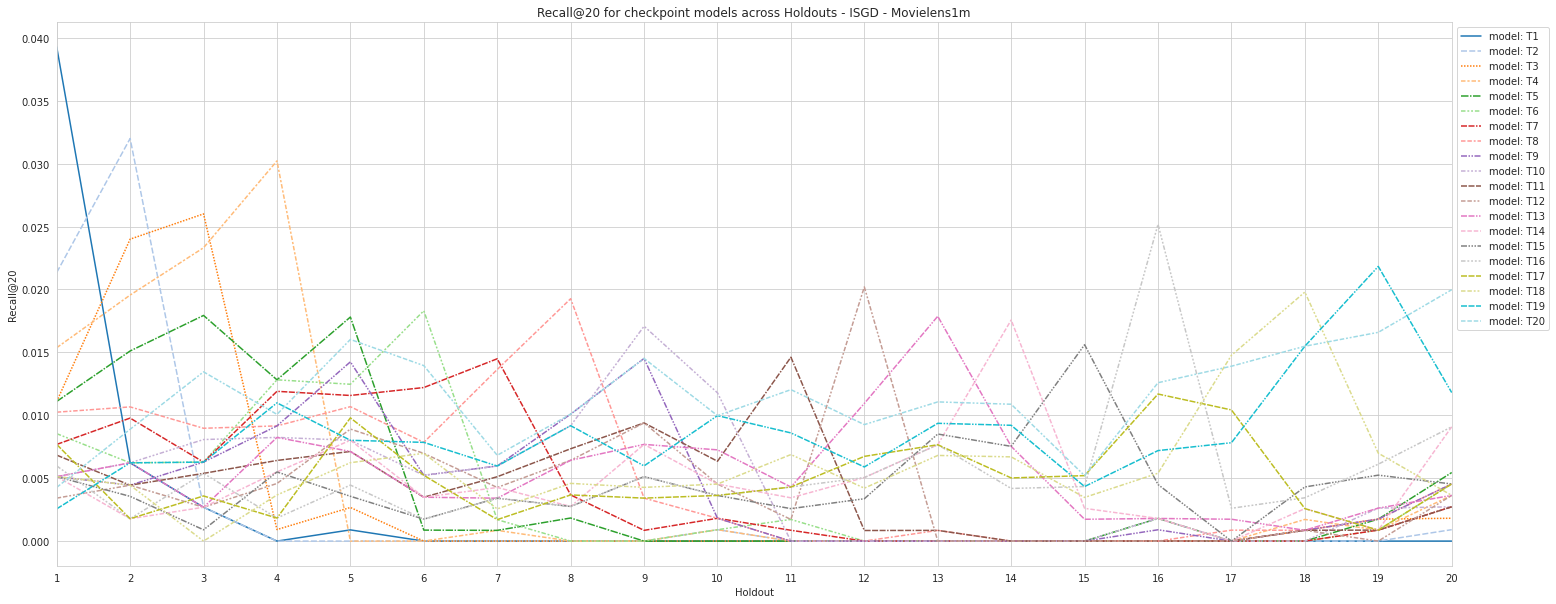

In [12]:
lineplot_recallxholdout(df,
    title='Recall@20 for checkpoint models across Holdouts - ISGD - Movielens1m',
    filepath='images/lineplots/movielens1m ISGD lineplot dfu_none.png'
    )

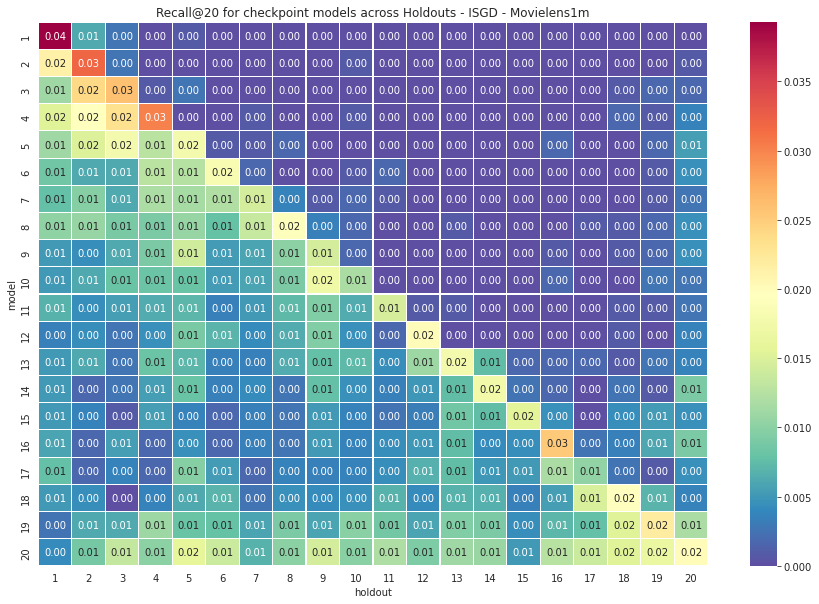

In [13]:
recall_heatmap(df,
    title='Recall@20 for checkpoint models across Holdouts - ISGD - Movielens1m',
    filepath='images/heatmaps/movielens1m ISGD heatmap dfu_none.png')

In [14]:
# def matrix_euclidean_distance(p, q):
#     return np.sqrt( np.sum( ( np.array(p) - np.array(q) )**2 ) )

# user_factor_diff = np.zeros(shape=(20, 20))
# item_factor_diff = np.zeros(shape=(20, 20))

# for i in range( len( eval.model_checkpoints ) ):
#     model_a = eval.model_checkpoints[i]
#     for j in range( i, len( eval.model_checkpoints ) ):
#         model_b = eval.model_checkpoints[j]

#         user_factors_a = model_a.user_factors
#         user_factors_b = model_b.user_factors
#         item_factors_a = model_a.item_factors
#         item_factors_b = model_b.item_factors

#         user_len_dif = len(  user_factors_b ) - len(  user_factors_a )
#         user_factors_a += [np.zeros(shape=(num_factors,)) for _ in range(user_len_dif)]
#         item_len_dif = len(  item_factors_b ) - len(  item_factors_a )
#         item_factors_a += [np.zeros(shape=(num_factors,)) for _ in range(item_len_dif)]

#         user_factor_diff[i, j] = matrix_euclidean_distance(user_factors_a, user_factors_b)
#         item_factor_diff[i, j] = matrix_euclidean_distance(item_factors_a, item_factors_b)

In [15]:
# mask = np.zeros_like(user_factor_diff, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# # Want diagonal elements as well
# mask[np.diag_indices_from(mask)] = False
# plt.figure(figsize=(15, 10))
# sns.heatmap( user_factor_diff.T, mask=mask, annot=True, fmt='0.1f', linewidths=.1, cmap='Spectral_r', xticklabels=labels, yticklabels=labels) 
# plt.ylabel('model')
# plt.xlabel('model')
# plt.title('Euclidean Distance between user factors - ISGD - Movielens1m');
# plt.savefig('output/ED user_factors heatmap movielens1m');

In [16]:
# mask = np.zeros_like(user_factor_diff, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# # Want diagonal elements as well
# mask[np.diag_indices_from(mask)] = False
# plt.figure(figsize=(15, 10))
# sns.heatmap( item_factor_diff.T, mask=mask, annot=True, fmt='0.1f', linewidths=.1, cmap='Spectral_r', xticklabels=labels, yticklabels=labels) 
# plt.ylabel('model')
# plt.xlabel('model')
# plt.title('Euclidean Distance between item factors - ISGD - Movielens1m');
# plt.savefig('output/ED item_factors heatmap movielens1m');

### default_user='random'

In [17]:
#exclude_known_items -- boolean, exclude known items from recommendation
# default_user -- str. One of: random, average, or median. If user is not present in model (new user) user factors are generated.
eval.EvaluateHoldouts(exclude_known_items=True, default_user='random')

In [18]:
rm = eval.results_matrix
df = pd.DataFrame(rm.T)
df.to_csv('output/movielens1m ISGD results_matrix dfu_random.csv', index=False)

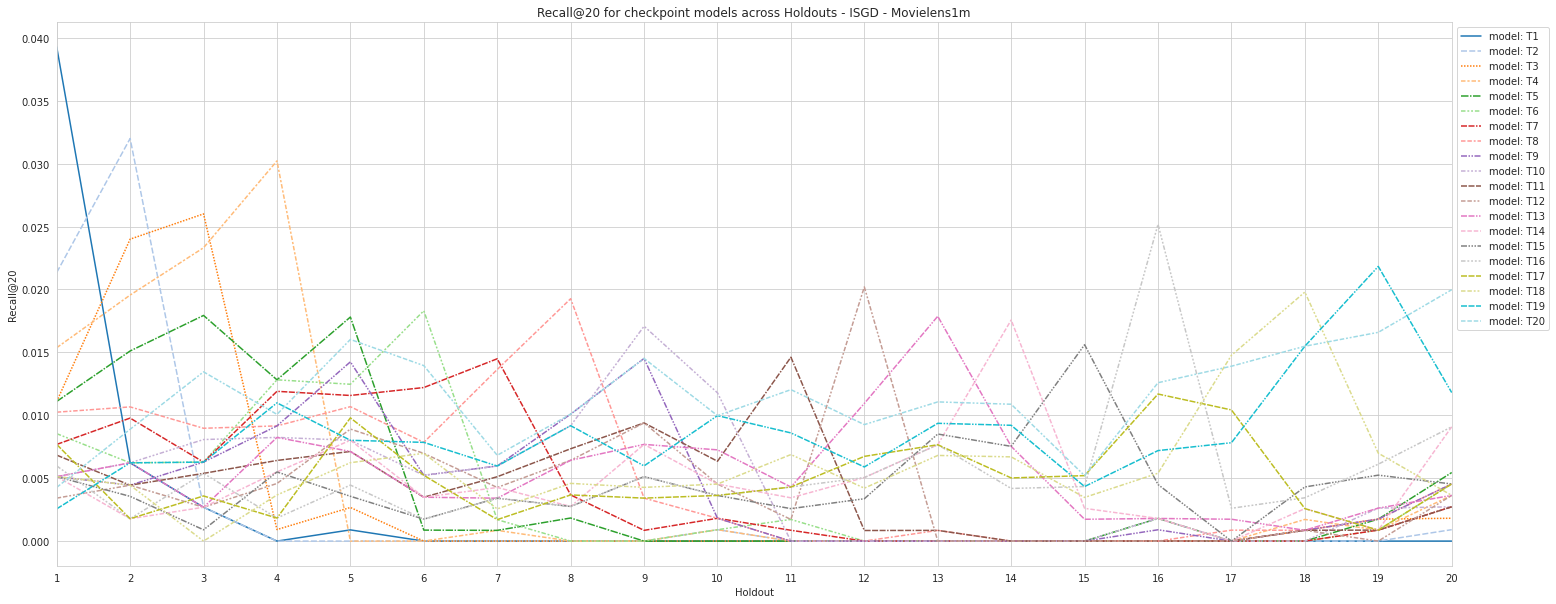

In [19]:
lineplot_recallxholdout(df,
    title='Recall@20 for checkpoint models across Holdouts - ISGD - Movielens1m',
    filepath='images/lineplots/movielens1m ISGD lineplot dfu_random.png'
    )

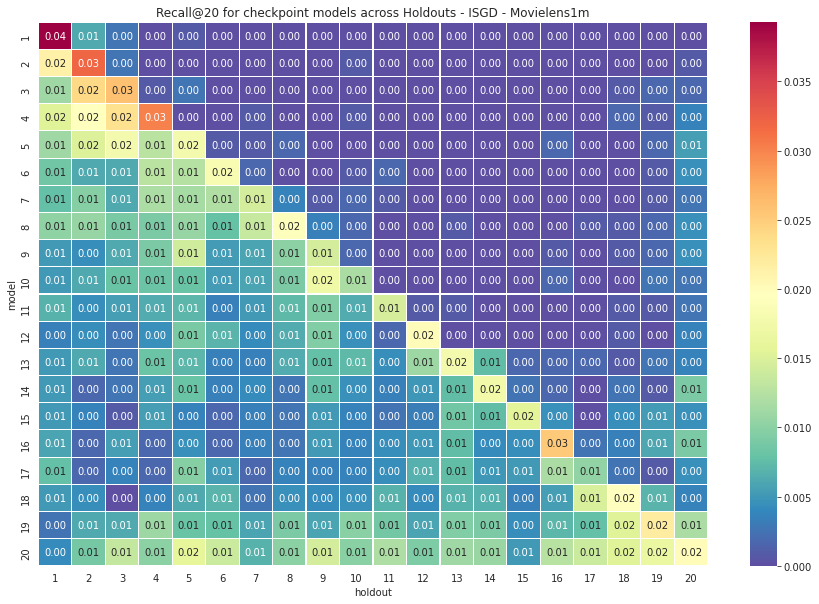

In [20]:
recall_heatmap(df,
    title='Recall@20 for checkpoint models across Holdouts - ISGD - Movielens1m',
    filepath='images/heatmaps/movielens1m ISGD heatmap dfu_random.png')

### default_user='average'

In [21]:
#exclude_known_items -- boolean, exclude known items from recommendation
# default_user -- str. One of: none, random, average, or median. If user is not present in model (new user) user factors are generated.
eval.EvaluateHoldouts(exclude_known_items=True, default_user='average')

In [22]:
rm = eval.results_matrix
df = pd.DataFrame(rm.T)
df.to_csv('output/movielens1m ISGD results_matrix dfu_average.csv', index=False)

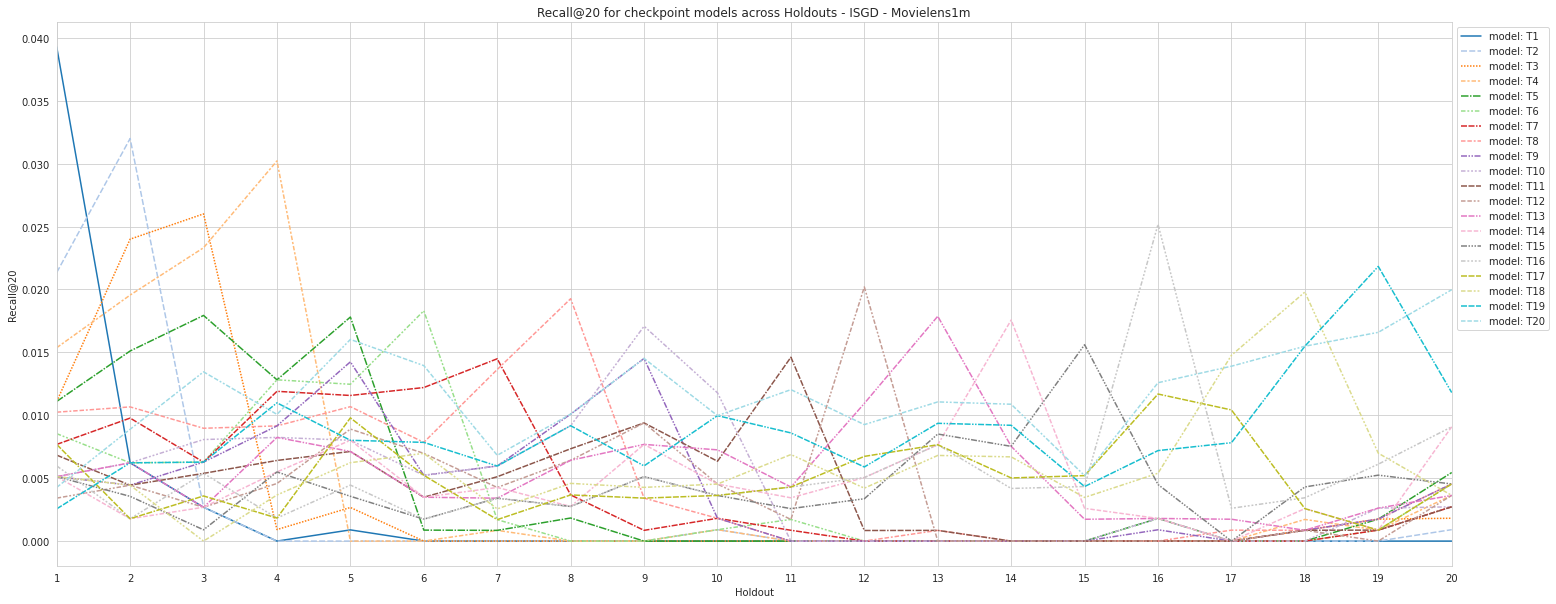

In [23]:
lineplot_recallxholdout(df,
    title='Recall@20 for checkpoint models across Holdouts - ISGD - Movielens1m',
    filepath='images/lineplots/movielens1m ISGD lineplot dfu_average.png'
    )

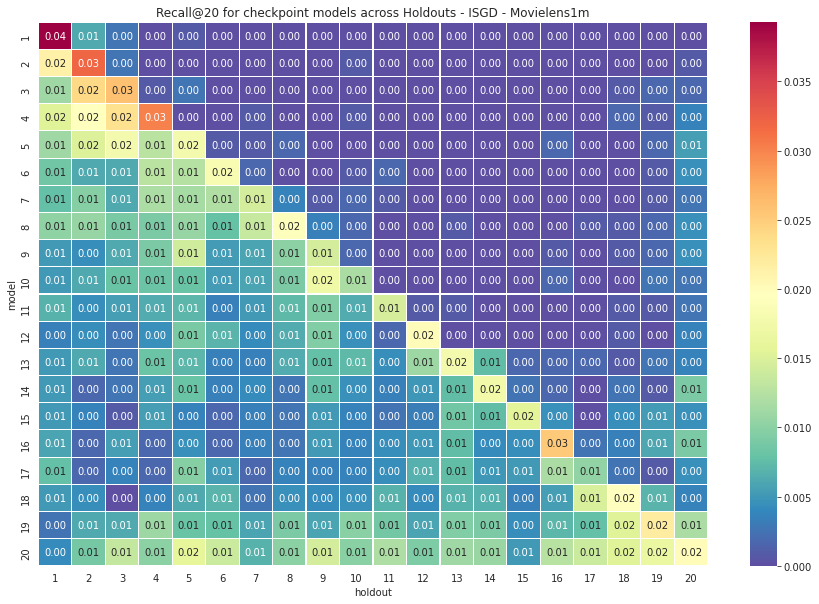

In [24]:
recall_heatmap(df,
    title='Recall@20 for checkpoint models across Holdouts - ISGD - Movielens1m',
    filepath='images/heatmaps/movielens1m ISGD heatmap dfu_average.png')

### default_user='median'

In [25]:
#exclude_known_items -- boolean, exclude known items from recommendation
# default_user -- str. One of: none, random, average, or median. If user is not present in model (new user) user factors are generated.
eval.EvaluateHoldouts(exclude_known_items=True, default_user='median')

In [26]:
rm = eval.results_matrix
df = pd.DataFrame(rm.T)
df.to_csv('output/movielens1m ISGD results_matrix dfu_median.csv', index=False)

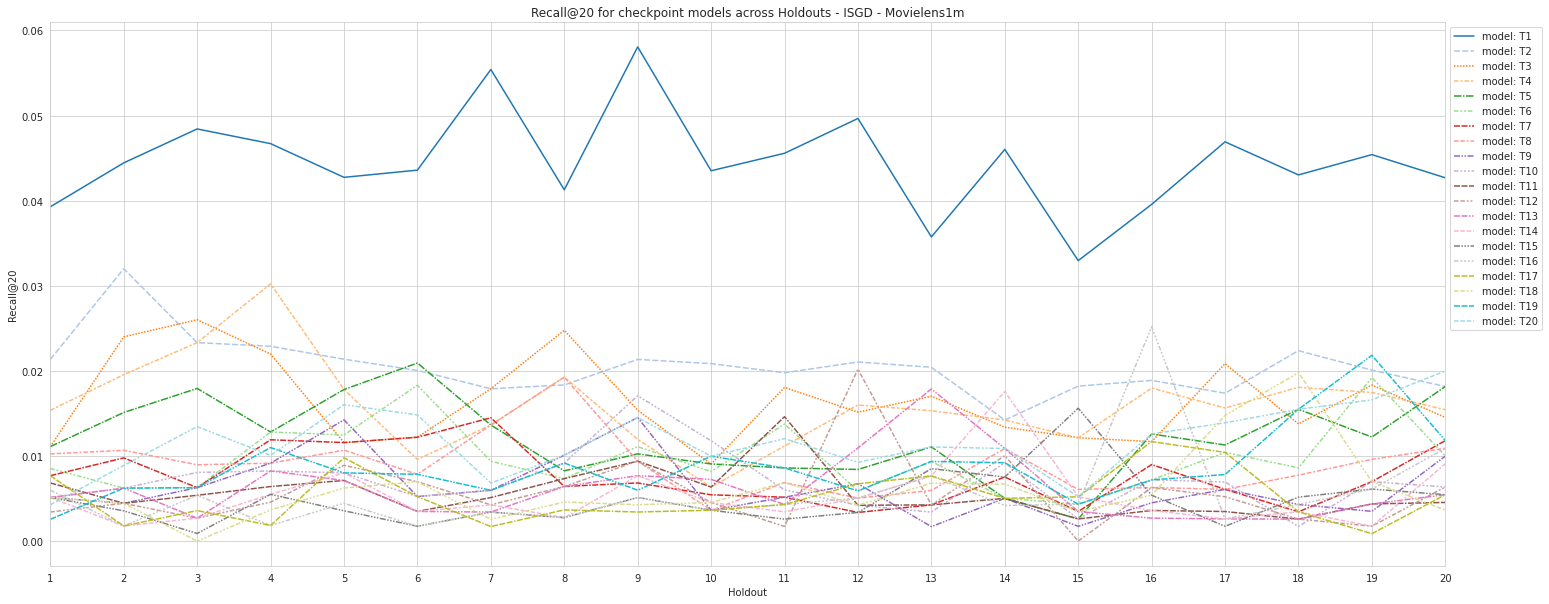

In [27]:
lineplot_recallxholdout(df,
    title='Recall@20 for checkpoint models across Holdouts - ISGD - Movielens1m',
    filepath='images/lineplots/movielens1m ISGD lineplot dfu_median.png'
    )

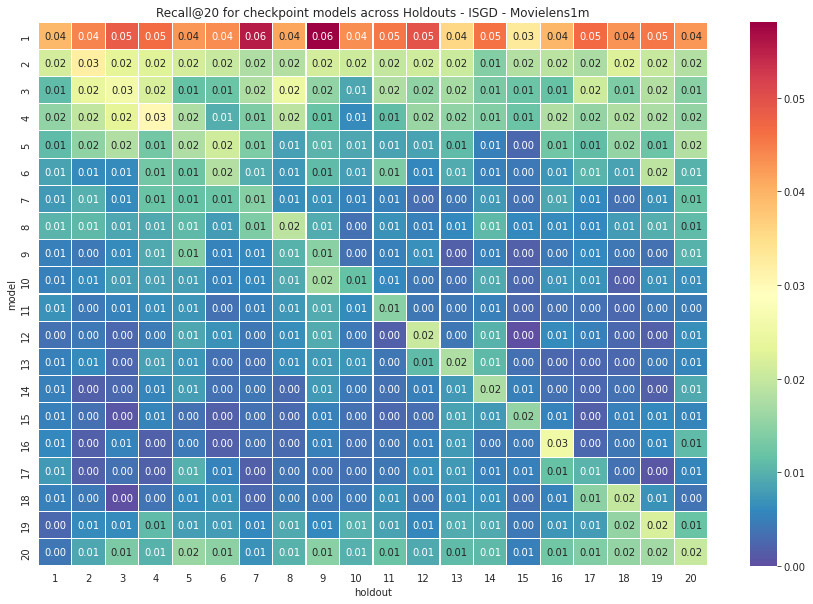

In [28]:
recall_heatmap(df,
    title='Recall@20 for checkpoint models across Holdouts - ISGD - Movielens1m',
    filepath='images/heatmaps/movielens1m ISGD heatmap dfu_median.png')

___

# Shuffled Dataset

In [13]:
shuffled_data = data.sample(frac=1).reset_index(drop=True).copy()

In [14]:
# transforma interações em objeto que contem mappings usuário-itens e item-usuários, contém também métodos de suporte.
# recebe listas
stream = ImplicitData(shuffled_data['UserID'].to_list(), shuffled_data['ItemID'].to_list()) 

empty_stream = ImplicitData([], [])

In [15]:
# O modelo não pode conter o stream, deve ser iniciado com uma lista vazia
# Se o stream for passado, ao excluir itens conhecidos o recall é sempre 0. Ao permitir a recomendação de itens já vistos, o recall não é 0.
model = ISGD(empty_stream, num_factors, num_iter, learn_rate = learn_rate, u_regularization = regularization, i_regularization = regularization, random_seed = 10)

In [16]:
eval = EvaluateAndStore(model=model,data=stream,n_holdouts=20,metrics = ["Recall@20"])

In [17]:
results=eval.EvaluateAndStore(start_eval=0, count=stream.size, store_only=True)

A seguir calculamos uma matrix de resultados - todos os checkpoints de modelo avaliados em todos os holdouts.
Exclude known items está LIGADO.

In [18]:
eval.EvaluateHoldouts(exclude_known_items=True)

In [19]:
rm1 = eval.results_matrix
df = pd.DataFrame(rm1)
df.to_csv('output/shuffled movielens1m results_matrix.csv', index=False)

In [20]:
# # Read results:
# rm1 = pd.read_csv('output/shuffled movielens1m results_matrix.csv')

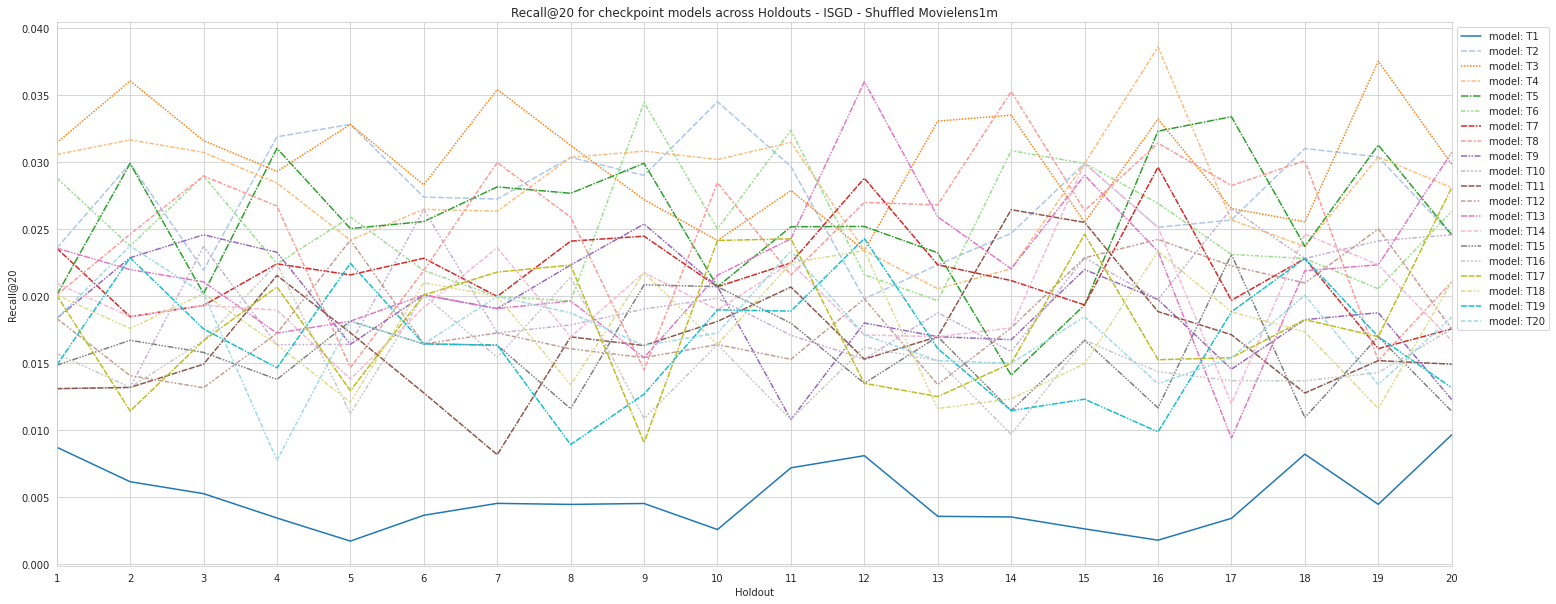

In [21]:
plt.figure(figsize=(25,10))
sns.lineplot(data=rm1, palette='tab20')
x_t = np.arange(0,20)
plt.xticks(x_t, labels=[str(i+1) for i in x_t])
plt.xlim(0, 19)
plt.xlabel('Holdout')
plt.ylabel('Recall@20')
plt.legend(bbox_to_anchor=(1.0,1), loc="upper left", labels=[f'model: T{model+1}' for model in range( rm1.shape[0] )])
plt.title('Recall@20 for checkpoint models across Holdouts - ISGD - Shuffled Movielens1m')
plt.savefig('output/recall20 lineplot shuffled movielens1m');

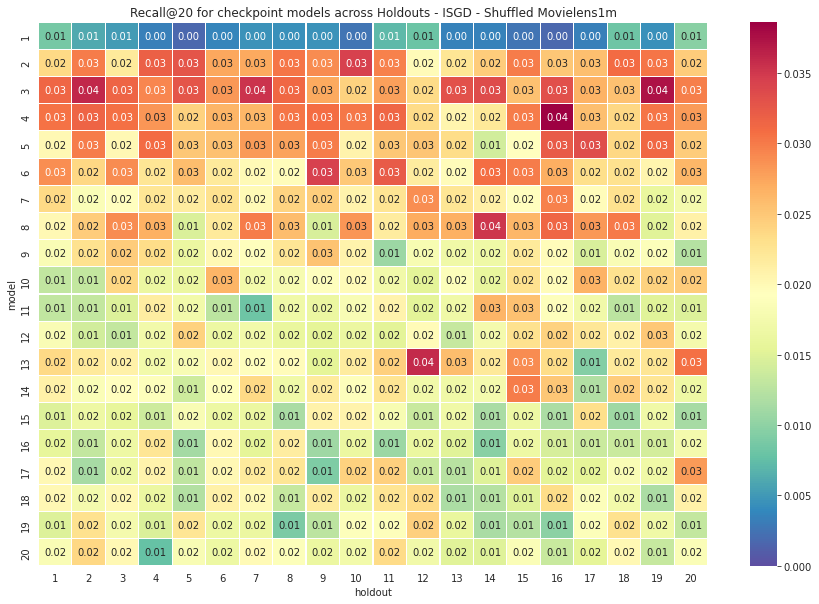

In [22]:
plt.figure(figsize=(15, 10))
x_t = np.arange(0,20)
labels=[str(i+1) for i in x_t]
sns.heatmap(rm1.T, vmin=0, vmax=rm1.max().max(), annot=True, fmt='0.2f', linewidths=.1, cmap='Spectral_r', xticklabels=labels, yticklabels=labels)
plt.ylabel('model')
plt.xlabel('holdout')
plt.title('Recall@20 for checkpoint models across Holdouts - ISGD - Shuffled Movielens1m');
plt.savefig('output/recall20 heatmap shuffled movielens1m');